### Coders Cave Internship - Data Science (Santha lakshmi S)
## PHASE 2 - Golden Task : Spam Filter using NLP and Machine Learning

In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import os
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
# Load the dataset
df = pd.read_csv('/content/emails.csv')

In [59]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [61]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [62]:
df['spam'].unique()

array([1, 0])

In [63]:
df['spam'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5728 entries, 0 to 5727
Series name: spam
Non-Null Count  Dtype
--------------  -----
5728 non-null   int64
dtypes: int64(1)
memory usage: 44.9 KB


In [64]:
df['text'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5728 entries, 0 to 5727
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
5728 non-null   object
dtypes: object(1)
memory usage: 44.9+ KB


In [65]:
(df['text'].unique)

<bound method Series.unique of 0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object>

In [66]:
def count_word(word, column):
  words = df[column].astype(str).str.lower().str.split()
  counts = words.apply(lambda x: x.count(word))
  return counts.sum()

word = '0'
column = 'spam'
frequency_0 = count_word(word, column)
print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')

The word "0" appears 4360 times in the column "spam".


In [67]:
word = '1'
column = 'spam'
frequency_1 = count_word(word, column)
print(f'The word "{word}" appears {frequency_1} times in the column "{column}".')

The word "1" appears 1368 times in the column "spam".


In [68]:
spam_probability = len(df[df['spam'] == 1]) / len(df)
ham_probability = len(df[df['spam'] == 0]) / len(df)

print('Spam Probability: ', spam_probability)
print('Ham Probability: ', ham_probability)

Spam Probability:  0.2388268156424581
Ham Probability:  0.7611731843575419


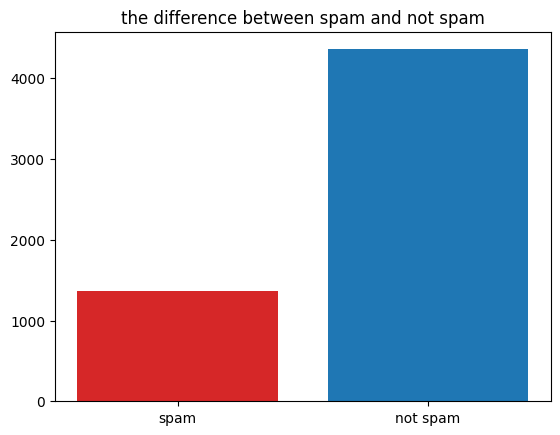

In [69]:
 def plot():
    words = ['spam','not spam']
    freq = [frequency_1 , frequency_0]
    plt.bar(words,freq, color=['tab:red', 'tab:blue'])
    plt.title('the difference between spam and not spam')
    plt.show()
plot()

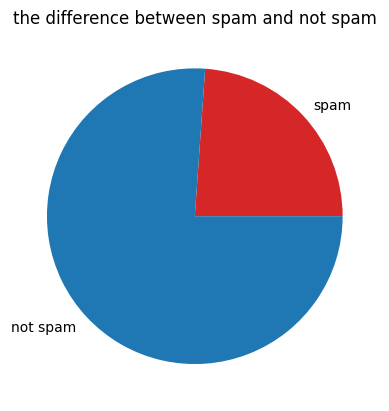

In [70]:
words = ['spam','not spam']
freq = [frequency_1 , frequency_0]

# Pie Chart
plt.pie(freq, labels=words, colors=['tab:red', 'tab:blue'])
plt.title('the difference between spam and not spam')
plt.show()

In [71]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Remove extra whitespaces
    text = [stemmer.stem(word) for word in text.split() if word.lower() not in stop_words]
    return ' '.join(text)

df['processed_text'] = df['text'].apply(preprocess_text)

In [72]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['spam'], test_size=0.2, random_state=42)

# Extract features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

In [73]:
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(df['text'])
label=df['spam']

X=spamham_countVectorizer
y=label

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [74]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [75]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([0, 0, 1, ..., 1, 1, 1])

In [76]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6972076788830716
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       861
           1       0.29      0.15      0.19       285

    accuracy                           0.70      1146
   macro avg       0.52      0.51      0.50      1146
weighted avg       0.64      0.70      0.66      1146



In [77]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    return ' '.join(tokens)

def build_vocabulary(texts):
    vocabulary = set()
    for text in texts:
        tokens = text.split()
        vocabulary.update(tokens)
    return list(vocabulary)

def create_bow(texts, vocabulary):
    bow_matrix = []
    for text in texts:
        tokens = text.split()
        bow_vector = [tokens.count(word) for word in vocabulary]
        bow_matrix.append(bow_vector)
    return bow_matrix

In [78]:
class CustomMultinomialNB:
    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = {}
        for i, c in enumerate(self.classes):
            X_c = X[np.where(y == c)]
            self.parameters["phi_" + str(c)] = len(X_c) / len(X)
            self.parameters["theta_" + str(c)] = (X_c.sum(axis=0) + self.alpha) / (np.sum(X_c.sum(axis=0) + self.alpha))

    def predict(self, X):
        predictions = []
        for x in X:
            phi_list = []
            for i, c in enumerate(self.classes):
                phi = np.log(self.parameters["phi_" + str(c)])
                theta = np.sum(np.log(self.parameters["theta_" + str(c)]) * x)
                phi_list.append(phi + theta)
            predictions.append(self.classes[np.argmax(phi_list)])
        return predictions

In [80]:
NB_classifier=CustomMultinomialNB()

# Accuracy
print('Accuracy: ', np.sum(y_predict_test == y_test) / len(y_test))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.9886561954624782
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       861
           1       0.29      0.15      0.19       285

    accuracy                           0.70      1146
   macro avg       0.52      0.51      0.50      1146
weighted avg       0.64      0.70      0.66      1146

